In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np

In [12]:
wage_data=pd.read_csv('C:/Users/yzcvo/Desktop/DS5500/KNN classifier/adult.data',header=None)
wage_data.columns=["age","work class","fnlwgt","education","education num","marital-status","occupation","relationship"
                   ,"race","gender","capital-gain","capital-loss","hours-per-week","native-country","predicted wage"]

In [13]:
wage_data

,age,work class,fnlwgt,education,education num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predicted wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


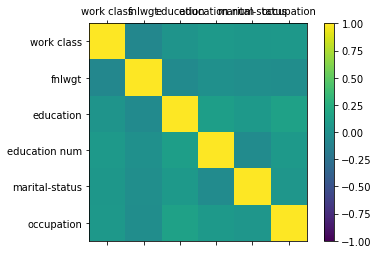

In [14]:
# visualization 1 
# in this part I will explore the relationship between all numerical variables
names=["age","work class","fnlwgt","education","education num","marital-status","occupation","relationship"
                   ,"race","gender","capital-gain","capital-loss","hours-per-week","native-country","predicted wage"]
correlations = wage_data.corr()
# plot correlation matrix
fig = plt.figure()
plot1 = fig.add_subplot(111)
cor_plot = plot1.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cor_plot)
plot1.set_xticklabels(names)
plot1.set_yticklabels(names)
plt.show()

In this visualization above I want to present the relationship between all numeric features and the task is explore the hidden relationship between these columns.So I choose the heat map as a visual encoding and use different color to express correlationship.
[get the inspiration from "Lecture 6 -visual encoding",page 34]
And we can find these features are independent.Thus it means there is no need to reduce the dimension and we can no longer worry change in one feature will affect others.

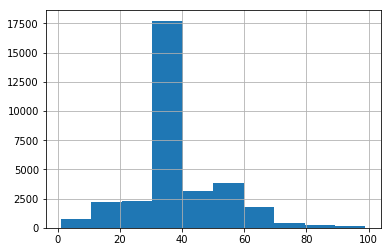

In [15]:
# visualization 2
# In this part I will explore the distribution of workers' weekly working hours
working_hour=wage_data['hours-per-week']
working_hour.hist()
plt.show()

In this visualization I want to present the distribution of workers' weekly work hours.
Here I choose the histgram as a visual encoding and let the height be the channel.
[get the inspiration from "Lecture 6 -visual encoding",page 18]
In this plot we can find the overall distribution is like normal distribution and the majority weekly work hour is between 20 hours and 60 hours.And since the distribution is kind like normal distribution,there is no need to do normalization on this feature.

In [16]:
# data preprocessing
# first step is to encoding all catagorical features,here I use interger encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data=wage_data['education']
values=array(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
wage_data['education']=integer_encoded
data=wage_data['work class']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['work class']=integer_encoded
data=wage_data['marital-status']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['marital-status']=integer_encoded
data=wage_data['occupation']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['occupation']=integer_encoded
data=wage_data['relationship']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['relationship']=integer_encoded
data=wage_data['race']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['race']=integer_encoded
data=wage_data['gender']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['gender']=integer_encoded
data=wage_data['native-country']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['native-country']=integer_encoded
data=wage_data['predicted wage']
values=array(data)
integer_encoded = label_encoder.fit_transform(values)
wage_data['predicted wage']=integer_encoded
# the second dtep is to spilt the training dataset and the testing dataset
wage_train, wage_test= train_test_split(wage_data,test_size=0.2)
# the last step is to standardization the numerical part in training part,here I merely strandaraize the
# fnlwgt,capitial-gain and capital loss columns
fnlwgt=wage_train['fnlwgt']
wage_train['fnlwgt'] = preprocessing.scale(fnlwgt)
capital_gain=wage_train['capital-gain']
wage_train['capital-gain']=preprocessing.scale(capital_gain)
capital_loss=wage_train['capital-loss']
wage_train['capital-loss']=preprocessing.scale(capital_loss)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In data pre-processing section I did three things.
The first one is use interger encoding to encode catagorical features.
This include work class,education,marital-status,occupation,relationship,race,gender,native-country and predicted wage.
That is because the knn classifier cannot deal with nature language and we need to encode different levels into different numbers.
The second part is I randomly spilt the dataset into 2 parts,80% for training part and 20% for testing part,
The last thing is I re-scale three numerical features:fnlwgt,capital gain and loss to avoid variables measured at different scales contributing unequally to the analysis

In [17]:
y=wage_train['predicted wage']
x=wage_train.drop(['predicted wage'],axis=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
# tuning hyperparameters
# define k range 
k_range = list(range(1, 11))
# define p range
p_range=list(range(1,3))
# generate grid search
param_grid = dict(n_neighbors=k_range,p=p_range)
#print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [22]:
# fing the best combination of hyper-parameters
grid.grid_scores_
print(grid.best_score_)
print(grid.best_params_)

0.8167613636363636
{'n_neighbors': 10, 'p': 1}


In [23]:
# visualization 3
k_scores=[]
k_range = list(range(1, 11))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.7671998135524396, 0.78800647371183996, 0.78819967965864168, 0.79706741998146247, 0.79426569092565547, 0.80159755403163913, 0.79910216064873985, 0.80516781837213647, 0.80336344824855144, 0.80585839948979654]


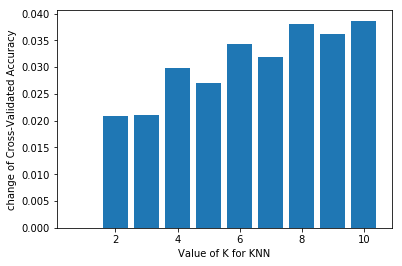

[0, 0.020806660159400359, 0.020999866106202081, 0.029867606429022864, 0.027065877373215863, 0.034397740479199523, 0.031902347096300243, 0.037968004819696866, 0.036163634696111835, 0.038658585937356937]


In [29]:
# visualization 3
d_scores=[0]
for k in range(1,10):
    diff=k_scores[k]-k_scores[0]
    d_scores.append(diff)
plt.bar(k_range, d_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('change of Cross-Validated Accuracy')
plt.show()
print(d_scores)

Here I want to emephasis the change of accuracy with the change of K.The target of this visualization is to find the best set of hyper-parameters and we are not so interested in how accurate it can be.
So here I plot a bar plot with the change of k and the delta of accuracy.the first element is 0 and the rest elements are calculated by the difference between itself and the first element.If the result is negative,it means k in this number will decrease the accuracy.And if the result is positive,it means k in this value can improve accuracy.



In [113]:
# testing
y1=wage_test['predicted wage']
x1=wage_test.drop(['predicted wage'],axis=1)

In [133]:
# testing,here y1 is the ture value and y2 is the predicted value
# I use the confusion matrix and the accuracy to evaluate the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10,p=1)
knn.fit(x1,y1)
y2=knn.predict(x1)
accuracy_score(y1,y2)

0.80377706126209125

In [134]:
confusion_matrix(y1, y2)

array([[4927,   37],
       [1241,  308]], dtype=int64)